<a href="https://colab.research.google.com/github/noufabdullahal/T5/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [169]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split



## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/RTA_Dataset.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [122]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,NaN,NaN,18-30,Male,Above high school,NaN,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,NaN,NaN,31-50,Male,Junior high school,NaN,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,NaN,NaN,18-30,Male,Junior high school,NaN,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,NaN,NaN,18-30,Male,Junior high school,NaN,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,NaN,NaN,18-30,Male,Junior high school,NaN,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [94]:
print(df.dtypes)

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [95]:
df['Time']=pd.to_numeric(df['Time'],errors='coerce')

In [111]:
df['Day_of_week']=pd.to_numeric(df['Day_of_week'],errors='coerce')

In [132]:
df['Casualty_severity']=pd.to_numeric(df['Casualty_severity'],errors='coerce')


In [153]:
df['Age_band_of_driver']=pd.to_numeric(df['Age_band_of_driver'],errors='coerce')

In [156]:
df['Sex_of_driver']=pd.to_numeric(df['Sex_of_driver'],errors='coerce')


In [158]:
df['Educational_level']=pd.to_numeric(df['Educational_level'],errors='coerce')

In [161]:
df=df.apply(pd.to_numeric,errors='coerce')

In [96]:
df.isnull().sum()

,0
Time,12316
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [60]:
#df["Educational_level"]=df["Educational_level"].fillna(df['Educational_level'].mode()[0])
#df["Vehicle_driver_relation"]= df["Vehicle_driver_relation"].fillna(df['Vehicle_driver_relation'].mode()[0])
#df["Driving_experience"]= df["Driving_experience"].fillna(df['Driving_experience'].mode()[0])
#df["Type_of_vehicle"]= df["Type_of_vehicle"].fillna(df['Type_of_vehicle'].mode()[0])
#df["Owner_of_vehicle"]= df["Owner_of_vehicle"].fillna(df['Owner_of_vehicle'].mode()[0])
#df["Service_year_of_vehicle"]= df["Service_year_of_vehicle"].fillna(df['Service_year_of_vehicle'].mode()[0])
#df["Defect_of_vehicle"]= df["Defect_of_vehicle"].fillna(df['Defect_of_vehicle'].mode()[0])
#df["Area_accident_occured"]= df["Area_accident_occured"].fillna(df['Area_accident_occured'].mode()[0])
#df["Work_of_casuality"]= df["Work_of_casuality"].fillna(df['Work_of_casuality'].mode()[0])
#df["Fitness_of_casuality"]= df["Fitness_of_casuality"].fillna(df['Fitness_of_casuality'].mode()[0])

In [61]:
#df["Lanes_or_Medians"]= df["Lanes_or_Medians"].fillna(df['Lanes_or_Medians'].mode()[0])
#df["Road_allignment"]= df["Road_allignment"].fillna(df['Road_allignment'].mode()[0])
#df["Types_of_Junction"]= df["Types_of_Junction"].fillna(df['Types_of_Junction'].mode()[0])
#df["Type_of_collision"]= df["Type_of_collision"].fillna(df['Type_of_collision'].mode()[0])
#df["Pedestrian_movement"]= df["Pedestrian_movement"].fillna(df['Pedestrian_movement'].mode()[0])

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [97]:
df.describe()

,Time,Number_of_vehicles_involved,Number_of_casualties
count,0.0,12316.000000,12316.000000
mean,NaN,2.040679,1.548149
std,NaN,0.688790,1.007179
min,NaN,1.000000,1.000000
25%,NaN,2.000000,1.000000
50%,NaN,2.000000,1.000000
75%,NaN,2.000000,2.000000
max,NaN,7.000000,8.000000


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [98]:

print(df.columns.tolist())

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


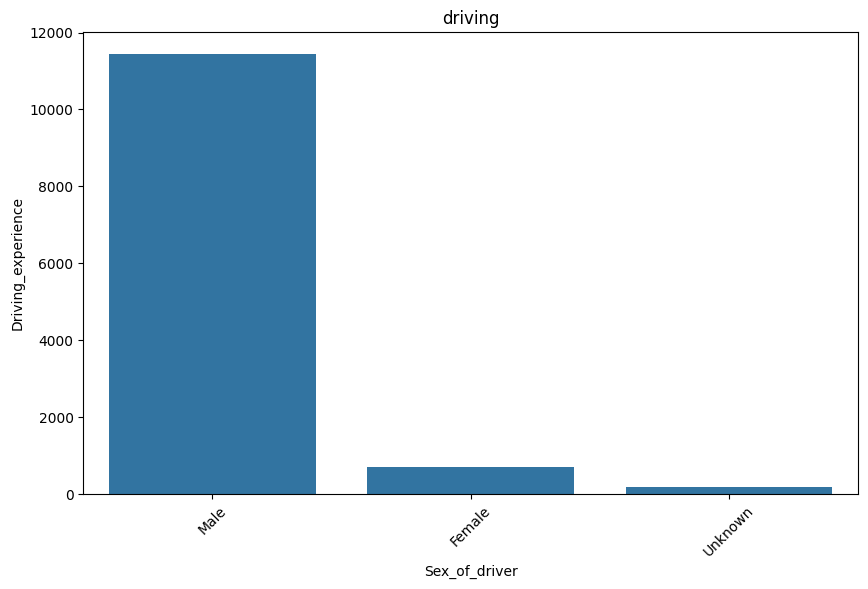

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex_of_driver', data=df)
plt.title('driving')
plt.xlabel('Sex_of_driver')
plt.ylabel('Driving_experience')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Number_of_vehicles_involved'>

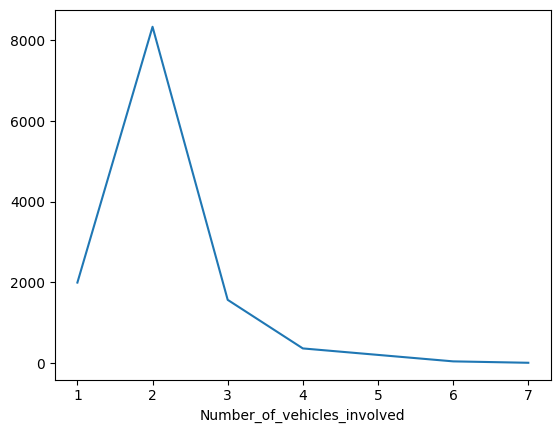

In [137]:
df['Number_of_vehicles_involved'].value_counts().sort_index().plot.line()

In [ ]:

print(df.columns.tolist())

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


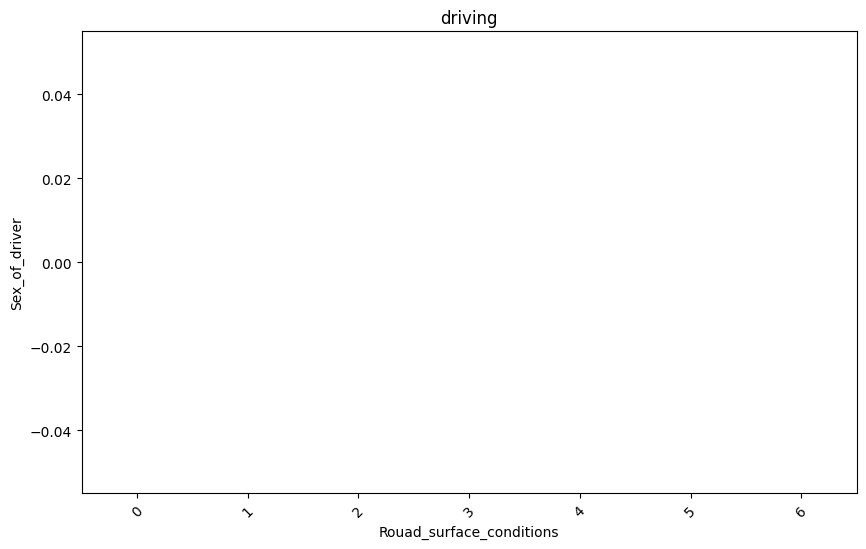

In [165]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_collision', data=df)
plt.title('driving')
plt.xlabel('Rouad_surface_conditions')

plt.ylabel('Sex_of_driver')
plt.xticks(rotation=45)
plt.show()

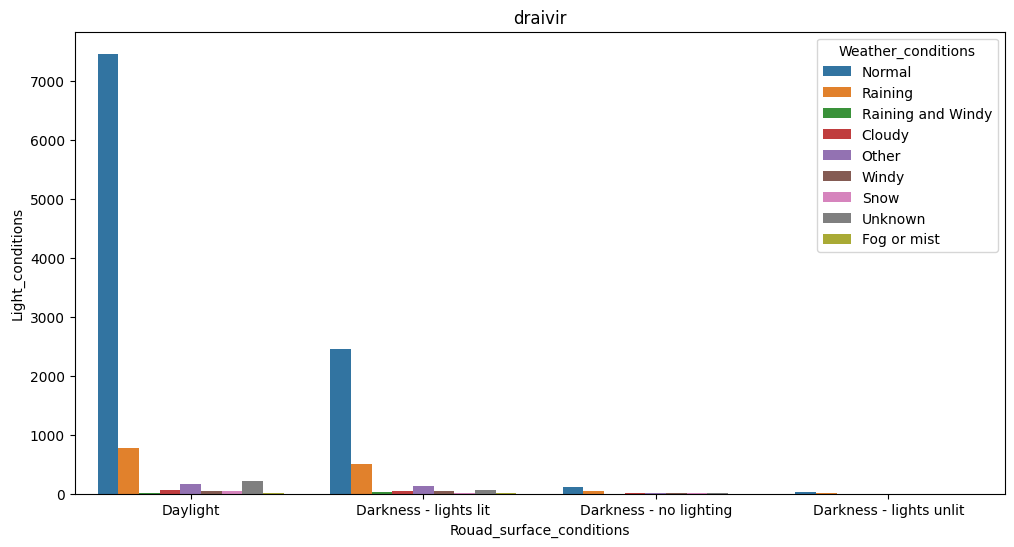

In [148]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Light_conditions', hue='Weather_conditions', data=df)
plt.title('draivir')
plt.xlabel('Rouad_surface_conditions')
plt.ylabel('Light_conditions')
plt.show()

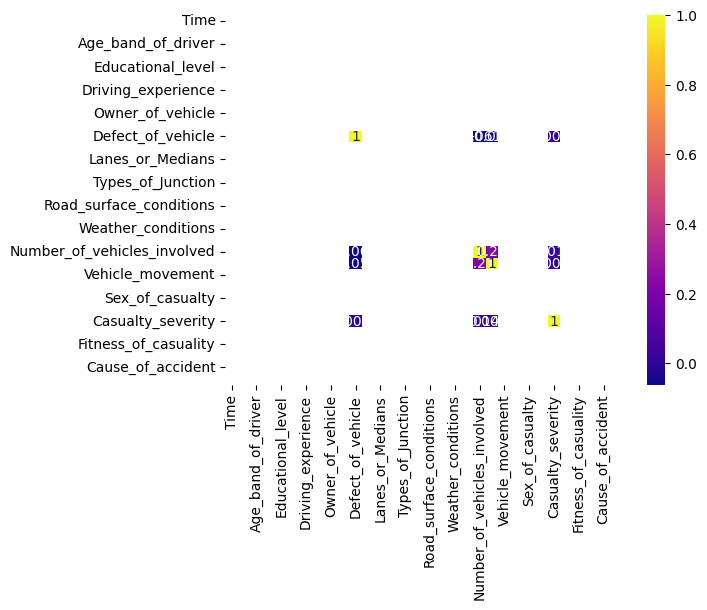

In [162]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [171]:
X=df.iloc[:,:-1]
y=df.iloc[:,:-1]

In [179]:

X_train,X_temp , y_train , y_temp= train_test_split(X,y,train_size=0.6, random_state=42)
X_test,X_val , y_test, y_val=train_test_split(X_temp,y_temp,test_size=0.5, random_state=42)

In [180]:
X_train,X_temp , y_train , t_temp= train_test_split(X,y,train_size=0.6, random_state=42)

In [183]:
print(df.columns.tolist())

['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [ ]:
df_train=pd.DataFrame(X_train,colummns=df.to_feather)
df_train['set']='train'
df_train['target']=y_train

df_train=pd.DataFrame(X_val,colummns=df.to_feather)
df_train['set']='val'
df_train['target']=y_val

df_train=pd.DataFrame(X_test,colummns=df.to_feather)
df_train['set']='test'
df_train['target']=y_test

In [ ]:
plt.gigure(figsize=(15,6))
sns.countplot(data=df_combined,x='target',hue='set')
plt.title('train and test')
plt.show()

In [ ]:
df_train

In [ ]:
df_combined=pd.concat([df_train,df_val,df_test])

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

#### Decision Tree Classifier

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: